In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
from tensorflow.keras.datasets import mnist

In [35]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

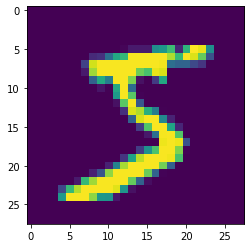

In [36]:
plt.imshow(x_train[0])

In [37]:
x_train=x_train/255
x_test=x_test/255

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape,Flatten,Dense

In [39]:
from tensorflow.keras.optimizers import SGD

In [40]:
28*28

784

In [41]:
784/2

392.0

In [42]:
encoder=Sequential()

encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [43]:
decoder=Sequential()
decoder.add(Dense(50,activation='relu',input_shape=[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape((28,28)))


In [44]:
autocoder=Sequential([encoder,decoder])

In [45]:
autocoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [46]:
autocoder.fit(x_train,x_train,epochs=30,validation_data=(x_test,x_test))

Epoch 1/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2510 - accuracy: 0.0899 - val_loss: 0.2093 - val_accuracy: 0.1315
Epoch 2/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1873 - accuracy: 0.1627 - val_loss: 0.1718 - val_accuracy: 0.1897
Epoch 3/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1597 - accuracy: 0.1990 - val_loss: 0.1503 - val_accuracy: 0.2058
Epoch 4/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1476 - accuracy: 0.2148 - val_loss: 0.1404 - val_accuracy: 0.2212
Epoch 5/30
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1390 - accuracy: 0.2259 - val_loss: 0.1350 - val_accuracy: 0.2277
Epoch 6/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1332 - accuracy: 0.2336 - val_loss: 0.1293 - val_accuracy: 0.2323
Epoch 7/30
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1297 - accuracy: 0.2386 - val_loss: 0.1295 - v

In [47]:
pred=autocoder.predict(x_test[7].reshape(1,28,28))

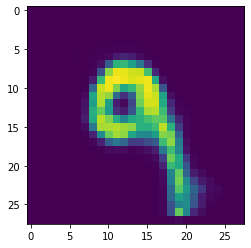

In [48]:
plt.imshow(pred.reshape(28,28))

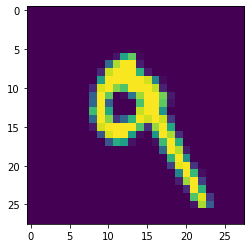

In [49]:
plt.imshow(x_test[7])

In [57]:
from tensorflow.keras.layers import GaussianNoise


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



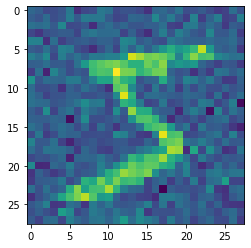

In [58]:
sample=GaussianNoise(0.2)
noiced=sample(x_train[0],training=True)
plt.imshow(noiced)



In [63]:
encoder=Sequential()
encoder.add(Flatten(input_shape=(28,28)))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [64]:
decoder=Sequential()
decoder.add(Dense(50,activation='relu',input_shape=[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape((28,28)))

In [65]:
noice_reducer=Sequential([encoder,decoder])


In [66]:
noice_reducer.compile(loss='binary_crossentropy',optimizer='adam')

In [67]:
noice_reducer.fit(x_train,x_train,validation_data=(x_test,x_test),batch_size=1,epochs=8)

Epoch 1/8
60000/60000 [==============================] - 349s 6ms/step - loss: 0.1756 - val_loss: 0.1579
Epoch 2/8
60000/60000 [==============================] - 340s 6ms/step - loss: 0.1583 - val_loss: 0.1518
Epoch 3/8
60000/60000 [==============================] - 340s 6ms/step - loss: 0.1547 - val_loss: 0.1512
Epoch 4/8
60000/60000 [==============================] - 347s 6ms/step - loss: 0.1532 - val_loss: 0.1500
Epoch 5/8
59996/60000 [============================>.] - ETA: 0s - loss: 0.1522

KeyboardInterrupt: 

TypeError: Invalid shape (1, 28, 28) for image data

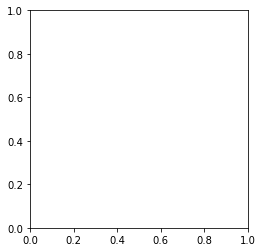

In [79]:
# plt.imshow(noice_reducer.predict(x_train[0].reshape(1,28,28)).reshape(28,28))
# plt.show()
# plt.imshow(x_train[0])
# plt.show()
plt.imshow(sample(x_train[0].reshape(1,28,28)).rehap)